# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [100]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

from api_keys import weather_api_key
from citipy import citipy
from scipy import stats

In [101]:

#Casts a dataframe with two very long sets of random numbers formatted for use as random lat/long coordinates
cities_df = pd.DataFrame({"long":(np.random.uniform(-1.8,1.8,1200)*100), "lat":(np.random.uniform(-0.9,0.9,1200)*100)})

####
#### API SAVER
####
#cities_df = cities_df.truncate(after = 59)


cities_df.head()

#city = citipy.nearest_city(22.99,120.21)
#city.country_code

,long,lat
0,100.965317,-38.563507
1,4.237174,28.203775
2,-15.076400,34.814123
3,-146.738450,-58.422238
4,-4.978010,4.430139


## Generate Cities List

In [102]:
cities_name = []
countrycode = []
for i in range(0,len(cities_df['lat'])):
    
    #API saver
    #if i>60:
        #break
    
    
    lat = cities_df.iloc[i]['lat']
    long = cities_df.iloc[i]['long']
    city = citipy.nearest_city(lat,long)
    
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)
    
cities_df['City'] = cities_name
cities_df['Country'] = countrycode
cities_df.head(10)

,long,lat,City,Country
0,100.965317,-38.563507,busselton,au
1,4.237174,28.203775,warqla,dz
2,-15.076400,34.814123,camacha,pt
3,-146.738450,-58.422238,mataura,pf
4,-4.978010,4.430139,grand-lahou,ci
5,-7.907743,32.727422,azimur,ma
6,-42.474356,65.086054,tasiilaq,gl
7,43.341909,69.296916,kamenka,ru
8,47.040228,85.601960,belushya guba,ru
9,-57.981887,75.499784,upernavik,gl


In [117]:
#drop duplicate cities in cities_df
cities_copy = cities_df.copy()
new_cities = cities_copy.drop_duplicates("City", keep = 'first')

#reset cities_df's index and truncate at 499 to provide sample size of 500 random cities.
new_cities = new_cities.reset_index(drop = True)
new_cities = new_cities.truncate( after=499)
new_cities

,long,lat,City,Country
0,100.965317,-38.563507,busselton,au
1,4.237174,28.203775,warqla,dz
2,-15.076400,34.814123,camacha,pt
3,-146.738450,-58.422238,mataura,pf
4,-4.978010,4.430139,grand-lahou,ci
...,...,...,...,...
495,-34.613936,2.943307,jardim,br
496,-94.801730,15.865695,san mateo del mar,mx
497,58.498803,37.945263,annau,tm
498,137.328833,46.570013,svetlaya,ru


In [122]:
api_key = weather_api_key


#Establish columns for data to be used in scatter plots
new_cities["Temp"]=""
new_cities["Humidity"]=""
new_cities["Cloudiness"]=""
new_cities["Wind (mph)"]=""
new_cities

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,100.965317,-38.563507,busselton,au,,,,
1,4.237174,28.203775,warqla,dz,,,,
2,-15.076400,34.814123,camacha,pt,,,,
3,-146.738450,-58.422238,mataura,pf,,,,
4,-4.978010,4.430139,grand-lahou,ci,,,,
...,...,...,...,...,...,...,...,...
495,-34.613936,2.943307,jardim,br,,,,
496,-94.801730,15.865695,san mateo del mar,mx,,,,
497,58.498803,37.945263,annau,tm,,,,
498,137.328833,46.570013,svetlaya,ru,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [123]:
#Use iterrows() to loop through the new_cities sample size and perform API calls for each 

In [124]:
#Test API block status

target_url=f"http://api.openweathermap.org/data/2.5/weather?q={new_cities.City[4]}&appid={weather_api_key}"
weather_json = requests.get(target_url).json()
print(weather_json)
#print(weather_api_key)
#print("       ")
#print("       ")
#print(weather_json["main"]["temp"])


#temp_list.append(weather_json["main"]["temp"])
#print(temp_list)

{'coord': {'lon': -5.02, 'lat': 5.14}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.12, 'feels_like': 298.72, 'temp_min': 297.12, 'temp_max': 297.12, 'pressure': 1013, 'humidity': 88, 'sea_level': 1013, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 4.32, 'deg': 215}, 'clouds': {'all': 80}, 'dt': 1599781574, 'sys': {'country': 'CI', 'sunrise': 1599718323, 'sunset': 1599762131}, 'timezone': 0, 'id': 2288105, 'name': 'Grand-Lahou', 'cod': 200}


In [125]:
temp_list = []
humid_list = []
cloud_list = []
wind_list = []

for index, row in new_cities.iterrows():
    
    
    #API saver
    #if index>60:
        #break
    
    target_url=f"http://api.openweathermap.org/data/2.5/weather?q={row[2]}&appid={weather_api_key}"
    weather_json = requests.get(target_url).json()
    print(f"Processing Record {index} | {row[2]}")
    
    try:
        #new_cities.set_value(index, "Temp", weather_json["main"]["temp"])
        temp_list.append(weather_json["main"]["temp"])
        humid_list.append(weather_json["main"]["humidity"])
        cloud_list.append(weather_json["clouds"]["all"])
        wind_list.append(weather_json["wind"]["speed"])
        
        
        #add in list appends here for Humidity, Cloudiness, and Wind (mph)
        
        
        
        
        #new_cities.set_value(index, "Humidity", weather_json["main"]["humidity"])
        #new_cities.set_value(index, "Cloudiness", weather_json["clouds"]["all"])
        #new_cities.set_value(index, "Wind (mph)", weather_json["wind"]["speed"])
        
    except:
        temp_list.append("")
        humid_list.append("")
        cloud_list.append("")
        wind_list.append("")
        print("City not found. Skipping...")

Processing Record 0 | busselton
Processing Record 1 | warqla
City not found. Skipping...
Processing Record 2 | camacha
Processing Record 3 | mataura
Processing Record 4 | grand-lahou
Processing Record 5 | azimur
City not found. Skipping...
Processing Record 6 | tasiilaq
Processing Record 7 | kamenka
Processing Record 8 | belushya guba
City not found. Skipping...
Processing Record 9 | upernavik
Processing Record 10 | bluff
Processing Record 11 | montepuez
Processing Record 12 | butaritari
Processing Record 13 | sorland
Processing Record 14 | flinders
Processing Record 15 | palabuhanratu
City not found. Skipping...
Processing Record 16 | broken hill
Processing Record 17 | urucara
Processing Record 18 | puerto ayora
Processing Record 19 | watsa
Processing Record 20 | ostrovnoy
Processing Record 21 | lompoc
Processing Record 22 | albany
Processing Record 23 | tomatlan
Processing Record 24 | poum
Processing Record 25 | isla mujeres
Processing Record 26 | choix
Processing Record 27 | sao fil

Processing Record 231 | khatanga
Processing Record 232 | henties bay
Processing Record 233 | lasa
Processing Record 234 | maymyo
Processing Record 235 | saint-michel-des-saints
Processing Record 236 | mattru
Processing Record 237 | waw
Processing Record 238 | verkhnyaya inta
Processing Record 239 | esperance
Processing Record 240 | kabo
Processing Record 241 | upington
Processing Record 242 | santo domingo
Processing Record 243 | tzucacab
Processing Record 244 | dawei
Processing Record 245 | sayyan
Processing Record 246 | hambantota
Processing Record 247 | bajil
Processing Record 248 | samut sakhon
Processing Record 249 | tokur
Processing Record 250 | saint joseph
Processing Record 251 | marawi
Processing Record 252 | saldanha
Processing Record 253 | bowen
Processing Record 254 | coquimbo
Processing Record 255 | cobija
Processing Record 256 | bengkulu
Processing Record 257 | east london
Processing Record 258 | amderma
City not found. Skipping...
Processing Record 259 | ancud
Processing

Processing Record 464 | tasbuget
City not found. Skipping...
Processing Record 465 | wewak
Processing Record 466 | buncrana
Processing Record 467 | ningyang
Processing Record 468 | kasra
City not found. Skipping...
Processing Record 469 | imbituba
Processing Record 470 | nishihara
Processing Record 471 | indramayu
Processing Record 472 | maketu
Processing Record 473 | tumannyy
City not found. Skipping...
Processing Record 474 | nelson bay
Processing Record 475 | andros town
Processing Record 476 | brae
Processing Record 477 | diapaga
Processing Record 478 | bogatyye saby
Processing Record 479 | nhulunbuy
Processing Record 480 | mabaruma
Processing Record 481 | anadyr
Processing Record 482 | olafsvik
Processing Record 483 | chicama
Processing Record 484 | lae
Processing Record 485 | muros
Processing Record 486 | labutta
City not found. Skipping...
Processing Record 487 | nuuk
Processing Record 488 | cleethorpes
Processing Record 489 | illela
Processing Record 490 | bukoba
Processing Rec

In [126]:
print(new_cities["Temp"])

0       
1       
2       
3       
4       
      ..
495     
496     
497     
498     
499     
Name: Temp, Length: 500, dtype: object


In [127]:
new_cities["Temp"] = temp_list
new_cities["Humidity"] = humid_list
new_cities["Cloudiness"] = cloud_list
new_cities["Wind (mph)"] = wind_list


#print(len(temp_list))
 

def kelv_to_fahr(temp_kelv):
    """Convert Kelvin to Fahrenheit
    
    Return Fahrenheit conversion of input"""
    
    temp_fahr = (temp_kelv)* 9/5 - 459.67
    return temp_fahr


#converts the strings to numbers so they can be formatted into fahrenheit
#new_cities.dropna() to get rid of the empty variables where data was lacking
#or do a reverse loc statement, removing all that has this characteristic - "NaN" or "" 
#before numericization

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)
new_cities = new_cities.drop(new_cities[new_cities.Temp == ""].index)

new_cities = new_cities.reset_index(drop = True)
new_cities["Temp"] = pd.to_numeric(new_cities["Temp"])
new_cities["Temp"] = kelv_to_fahr(new_cities["Temp"])



new_cities.head(10)

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,100.965317,-38.563507,busselton,au,47.066,80,92,2.04
1,-15.076400,34.814123,camacha,pt,71.600,73,40,6.2
2,-146.738450,-58.422238,mataura,pf,50.000,63,90,0.45
3,-4.978010,4.430139,grand-lahou,ci,75.146,88,80,4.32
4,-42.474356,65.086054,tasiilaq,gl,33.800,95,100,1
5,43.341909,69.296916,kamenka,ru,60.476,49,31,4.86
6,-57.981887,75.499784,upernavik,gl,34.754,95,100,6.44
7,164.004220,-64.940001,bluff,nz,50.000,63,67,0.45
8,37.731842,-13.575440,montepuez,mz,67.406,72,50,3.16
9,170.525185,12.168590,butaritari,ki,82.580,77,85,7.89


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [128]:
#export dataframe as csv
#new_cities is a whole set of data, cleaned up, populated, and sorted together. Any missing cities have been pruned out.
#This is the time to save the dataset to a csv for file output. Everything after here will use copies of new_cities or 
#changes to it.

#export save as csv etc
new_cities.to_csv('WeatherPy-SampleCities.csv')
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,100.965317,-38.563507,busselton,au,47.066,80,92,2.04
1,-15.076400,34.814123,camacha,pt,71.600,73,40,6.2
2,-146.738450,-58.422238,mataura,pf,50.000,63,90,0.45
3,-4.978010,4.430139,grand-lahou,ci,75.146,88,80,4.32
4,-42.474356,65.086054,tasiilaq,gl,33.800,95,100,1


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [129]:
#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

new_cities = new_cities.drop(new_cities[new_cities.Humidity > 100].index)
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,100.965317,-38.563507,busselton,au,47.066,80,92,2.04
1,-15.076400,34.814123,camacha,pt,71.600,73,40,6.2
2,-146.738450,-58.422238,mataura,pf,50.000,63,90,0.45
3,-4.978010,4.430139,grand-lahou,ci,75.146,88,80,4.32
4,-42.474356,65.086054,tasiilaq,gl,33.800,95,100,1


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

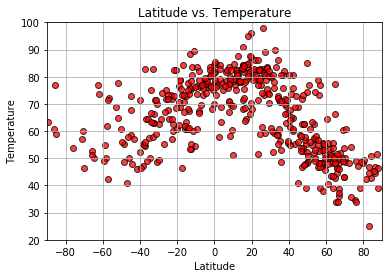

<Figure size 432x288 with 0 Axes>

In [130]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature")
plt.xlim(-90,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsTemp.png")

## Latitude vs. Humidity Plot

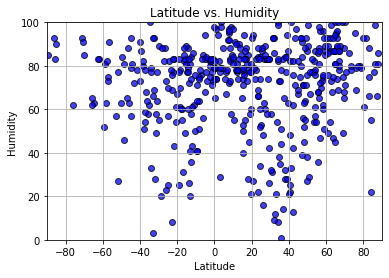

<Figure size 432x288 with 0 Axes>

In [131]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Humidity"]

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsHum.png")

## Latitude vs. Cloudiness Plot

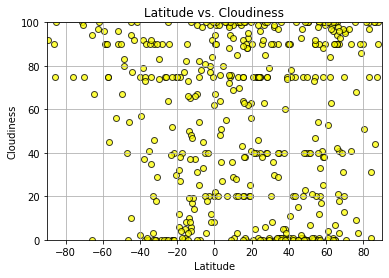

<Figure size 432x288 with 0 Axes>

In [132]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Cloudiness"]

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsCloud.png")

## Latitude vs. Wind Speed Plot

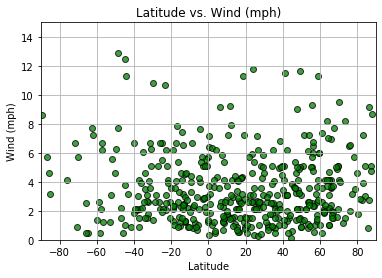

<Figure size 432x288 with 0 Axes>

In [133]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Wind (mph)"]

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph)")
plt.xlim(-90,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
plt.show()

#save as png
plt.savefig("LatvsWind.png")

## Linear Regression

In [134]:
#Exactly as above, but need to create two new DFs - north and south - and then just run all the same graphs out of them. Easy.

In [135]:
# split the dataframe into two dataframes, North and South
# Your second requirement is to run linear regression on 
# each relationship, only this time separating them into 
# Northern Hemisphere (greater than or equal to 0 degrees 
# latitude) and Southern Hemisphere (less than 0 degrees latitude):

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

south_df = new_cities.copy()
south_df = south_df.drop(south_df[south_df.lat >= 0].index)
south_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,100.965317,-38.563507,busselton,au,47.066,80,92,2.04
2,-146.738450,-58.422238,mataura,pf,50.000,63,90,0.45
7,164.004220,-64.940001,bluff,nz,50.000,63,67,0.45
8,37.731842,-13.575440,montepuez,mz,67.406,72,50,3.16
11,131.357987,-32.512437,flinders,au,62.996,69,46,1.79
...,...,...,...,...,...,...,...,...
443,-89.853082,-13.670326,chicama,pe,60.962,83,19,2.43
444,147.201116,-6.685374,lae,pg,77.108,83,98,0.85
449,32.443898,-1.343023,bukoba,tz,68.198,71,84,1.95
451,-63.227570,-31.256935,cordoba,ar,71.294,49,18,3.6


In [136]:
north_df = new_cities.copy()
north_df = north_df.drop(north_df[north_df.lat <= 0].index)
north_df

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
1,-15.076400,34.814123,camacha,pt,71.600,73,40,6.2
3,-4.978010,4.430139,grand-lahou,ci,75.146,88,80,4.32
4,-42.474356,65.086054,tasiilaq,gl,33.800,95,100,1
5,43.341909,69.296916,kamenka,ru,60.476,49,31,4.86
6,-57.981887,75.499784,upernavik,gl,34.754,95,100,6.44
...,...,...,...,...,...,...,...,...
454,-34.613936,2.943307,jardim,br,82.814,29,76,1.25
455,-94.801730,15.865695,san mateo del mar,mx,84.128,76,63,4.07
456,58.498803,37.945263,annau,tm,66.200,32,0,1
457,137.328833,46.570013,svetlaya,ru,58.028,80,93,5.35


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

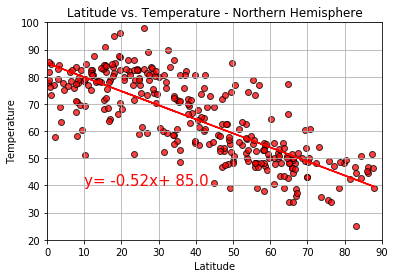

<Figure size 432x288 with 0 Axes>

In [137]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempNorth.png")

In [138]:
#ANALYSIS: As latitude goes up, temperature goes down. IE: It gets colder further from the equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

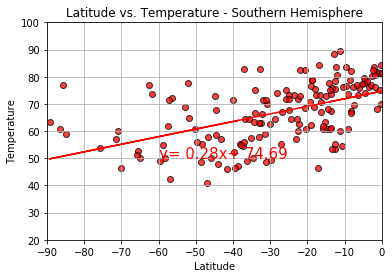

<Figure size 432x288 with 0 Axes>

In [139]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsTempSouth.png")

In [140]:
#ANALYSIS: The lower the latitude past the equator, the colder the temperature gets again. This proves that it is
#hotter at the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

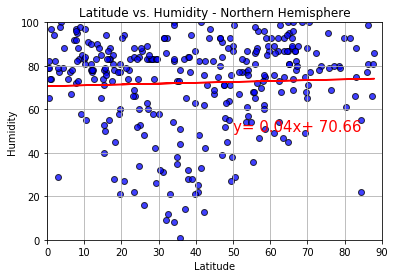

<Figure size 432x288 with 0 Axes>

In [141]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Humidity"]

data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

##add regression
#np.cov(label0.astype(float), rowvar=False)

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsHumNorth.png")

In [142]:
#ANALYSIS: There is only a slight increase in humidity with latitude. 
#This suggests that there is a weak connection between the two.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

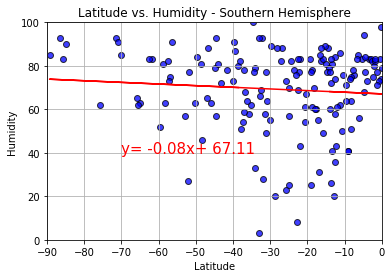

<Figure size 432x288 with 0 Axes>

In [143]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Humidity"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

plt.savefig("LatvsHumSouth.png")

In [144]:
#ANALYSIS: There is only a slight increase in humidity with latitude. 
#This suggests that there is a weak connection between the two.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

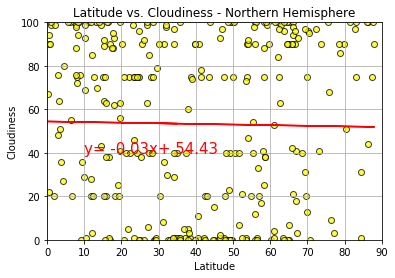

<Figure size 432x288 with 0 Axes>

In [145]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.show()
#save as png

plt.savefig("LatvsCloudNorth.png")

In [146]:
#ANALYSIS: The data set of cloudiness is incredibly varied, suggesting
#there is very little connection between latitude and cloud cover.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

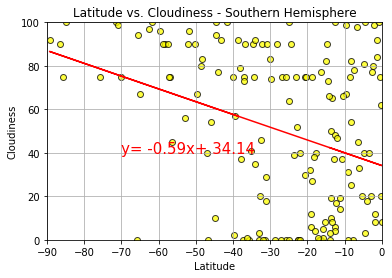

<Figure size 432x288 with 0 Axes>

In [147]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Cloudiness"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-70,40),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsCloudSouth.png")

In [148]:
#ANALYSIS: The data set of cloudiness is incredibly varied, suggesting
#there is very little connection between latitude and cloud cover.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

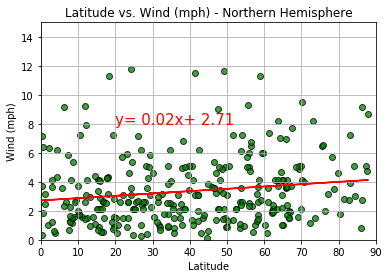

<Figure size 432x288 with 0 Axes>

In [149]:
#plt.scatter(x,y,other this and that)
x_axis = north_df["lat"]
data = north_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Northern Hemisphere")
plt.xlim(0,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,8),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindNorth.png")

In [150]:
#ANALYSIS: The data for wind speed at latitude does not have
#a very convincing regression line and suggests that there isn't much of a connection.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

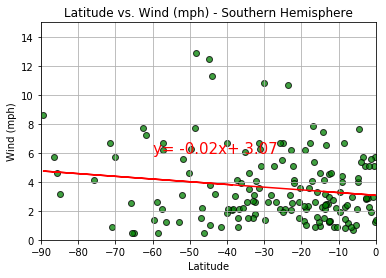

<Figure size 432x288 with 0 Axes>

In [151]:
#plt.scatter(x,y,other this and that)
x_axis = south_df["lat"]
data = south_df["Wind (mph)"]
data = data.astype(float)

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph) - Southern Hemisphere")
plt.xlim(-90,0)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)

##add regression

## REGRESSION

(slope, intercept, rvalue, pvalue, stderr)=stats.linregress(x_axis,data)
regress_values = x_axis*slope+intercept
line_eq="y= "+ str(round(slope,2))+"x+ " + str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-60,6),fontsize=15,color="red")
plt.show()

#save as png
plt.savefig("LatvsWindSouth.png")

In [152]:
#ANALYSIS: The data for wind speed at latitude does not have
#a very convincing regression line and suggests that there isn't much of a connection.